<a href="https://colab.research.google.com/github/RicardoHG7/Valores-at-picos/blob/main/Valores_Atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ricardo Herrera Guerrero 
A01422698

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('data1.csv')
df

In [15]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos
     

Unnamed: 0.1                           0
Unnamed: 0                             0
indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_art

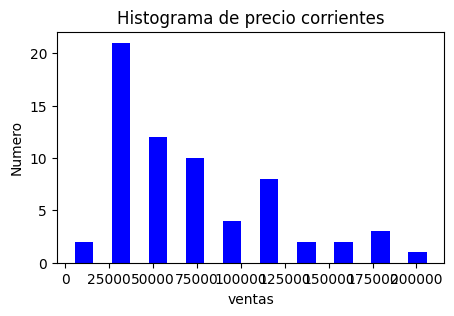

In [4]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_precios_corrientes"], color='blue', rwidth=0.50)
plt.title('Histograma de precio corrientes')
plt.xlabel('ventas')
plt.ylabel('Numero')

plt.show() #dibujamos el histograma
     

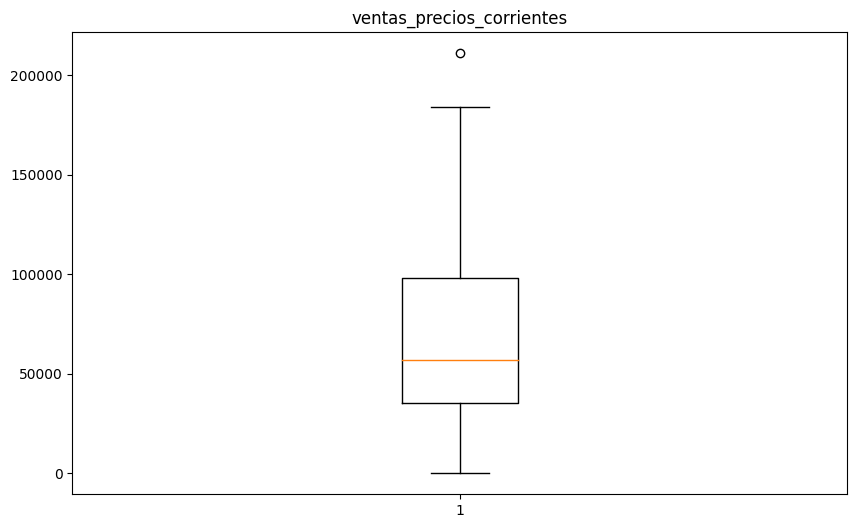

In [5]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_precios_corrientes"]) 
plt.title("ventas_precios_corrientes")
plt.show() #dibujamos el diagrama

In [6]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["ventas_precios_corrientes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 192319.35000000003
Limite inferior permitido -59178.650000000016


In [7]:
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
42,42,42,01/07/2020,211140.7,50791.4,81140696.22,76413721.76,4726974.457,81140696.22,24935747.29,...,23393038.41,2630487.791,9592798.115,8463266.123,2712593.828,518942.5376,11217153.19,2502616.619,6125265.839,5935993.913


In [8]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,0,0,01/01/2017,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,1,1,01/02/2017,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,2,2,01/03/2017,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,3,3,01/04/2017,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,4,4,01/05/2017,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,61,61,01/02/2022,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,0.000000e+00,9.189746e+06,1.330139e+07
62,62,62,01/03/2022,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,0.000000e+00
63,63,63,01/04/2022,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,0.000000e+00,1.191048e+07


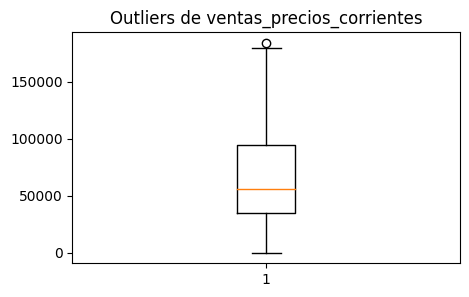

In [9]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["ventas_precios_corrientes"]) 
plt.title("Outliers de ventas_precios_corrientes")
plt.show() #dibujamos el diagrama

In [10]:
df.to_csv("df.csv")
from google.colab import files   
files.download("df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

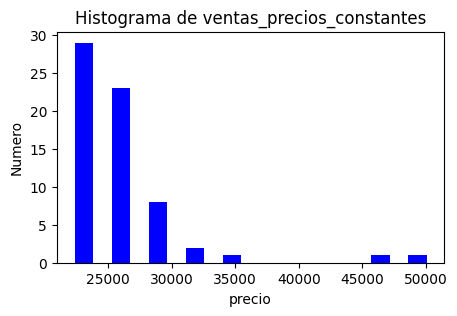

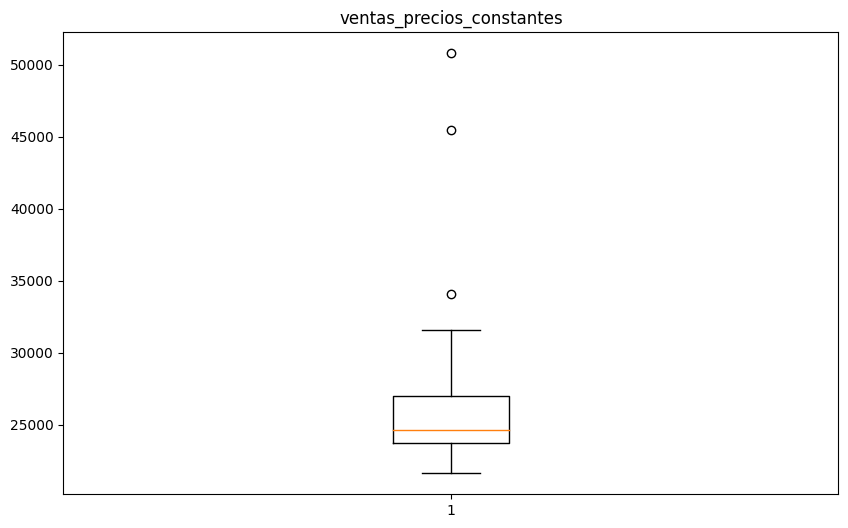

Limite superior permitido 31938.75
Limite inferior permitido 18759.949999999997


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
11,11,11,01/12/2017,40766.3,34084.5,4.076632e+07,4.032029e+07,4.460368e+05,4.076632e+07,13710305.37,...,9.667850e+06,1346130.813,3.684165e+06,3.674954e+06,1398334.689,4.762751e+05,5.239243e+06,1278355.018,2.857323e+06,4.502834e+06
42,42,42,01/07/2020,211140.7,50791.4,8.114070e+07,7.641372e+07,4.726974e+06,8.114070e+07,24935747.29,...,2.339304e+07,2630487.791,9.592798e+06,8.463266e+06,2712593.828,5.189425e+05,1.121715e+07,2502616.619,6.125266e+06,5.935994e+06
60,60,60,01/01/2022,154517.1,45463.4,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,46962602.22,...,3.750517e+07,4860317.680,1.610477e+07,1.740849e+07,6138441.197,1.401929e+06,2.133021e+07,3782646.219,1.218755e+07,1.343307e+07


In [40]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["ventas_precios_constantes"], color='blue', rwidth=0.50)
plt.title('Histograma de ventas_precios_constantes')
plt.xlabel('precio')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["ventas_precios_constantes"]) 
plt.title("ventas_precios_constantes")
plt.show() #dibujamos el diagrama
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["ventas_precios_constantes"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

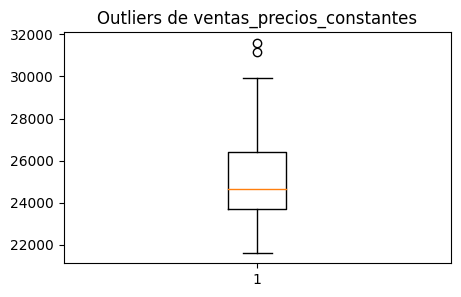

In [42]:

#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["ventas_precios_constantes"]) 
plt.title("Outliers de ventas_precios_constantes")
plt.show() #dibujamos el diagrama

In [13]:
df.to_csv("df2.csv")
from google.colab import files   
files.download("df2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

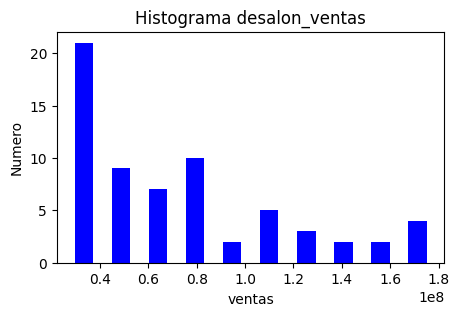

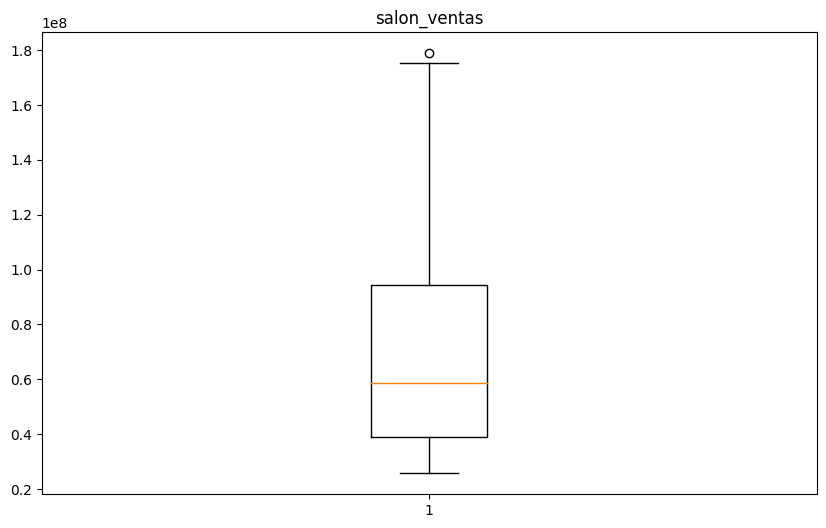

Limite superior permitido 178032309.45499998
Limite inferior permitido -44655061.705000006


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [23]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["salon_ventas"], color='blue', rwidth=0.50)
plt.title('Histograma desalon_ventas')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["salon_ventas"]) 
plt.title("salon_ventas")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["salon_ventas"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

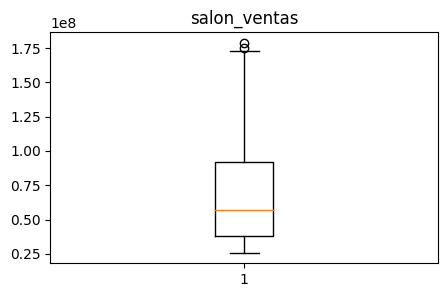

In [31]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["salon_ventas"]) 
plt.title("salon_ventas")
plt.show() #dibujamos el diagrama

In [32]:
df.to_csv("df3.csv")
from google.colab import files   
files.download("df3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

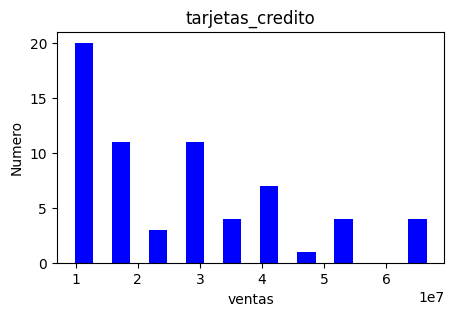

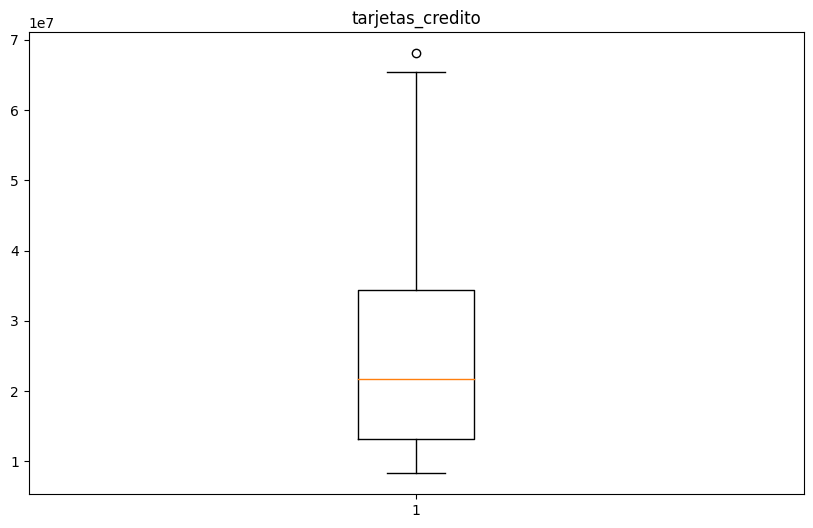

Limite superior permitido 66191782.864999995
Limite inferior permitido -18528673.494999994


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [48]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["tarjetas_credito"], color='blue', rwidth=0.50)
plt.title('tarjetas_credito')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["tarjetas_credito"]) 
plt.title("tarjetas_credito")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["tarjetas_credito"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr


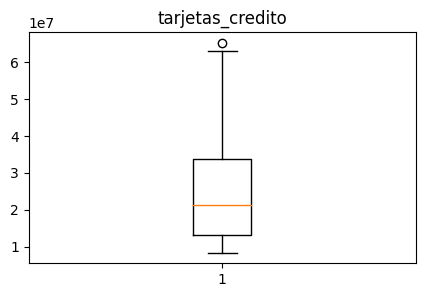

In [50]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["tarjetas_credito"]) 
plt.title("tarjetas_credito")
plt.show() #dibujamos el diagrama

In [51]:
df.to_csv("df4.csv")
from google.colab import files   
files.download("df4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

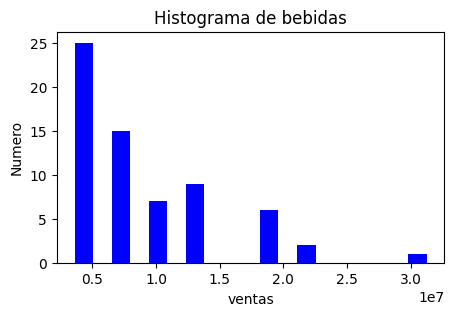

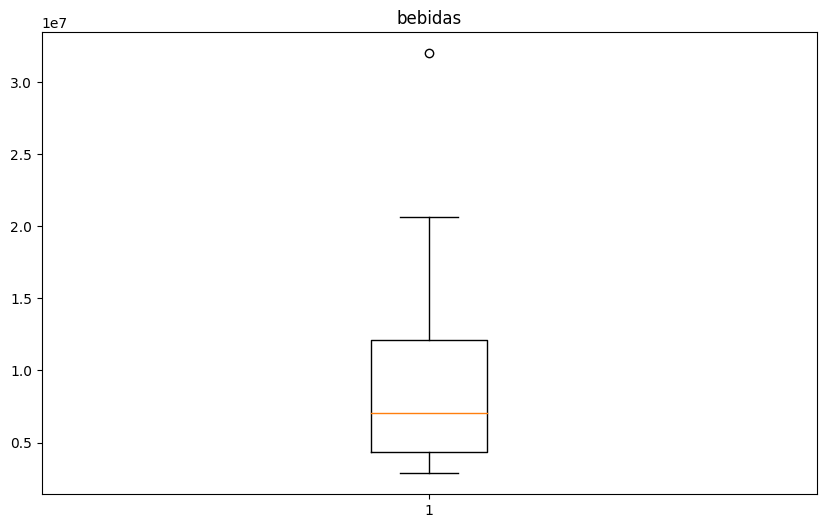

Limite superior permitido 26598395.879517693
Limite inferior permitido -8724813.04351769


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [59]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["bebidas"], color='blue', rwidth=0.50)
plt.title('Histograma de bebidas')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["bebidas"]) 
plt.title("bebidas")
plt.show() #dibujamos el diagrama

#Método aplicando desviación estandar. Encuentro los valores extremos
y=df["bebidas"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

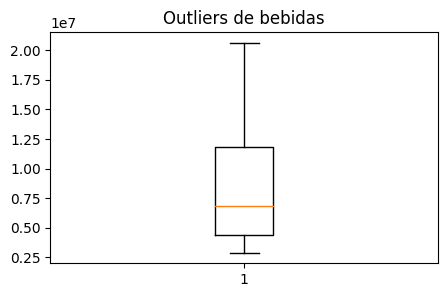

In [61]:
#Obtenemos datos limpios
data_clean= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["bebidas"]) 
plt.title("Outliers de bebidas")
plt.show() #dibujamos el diagrama

In [62]:
df.to_csv("df5.csv")
from google.colab import files   
files.download("df5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

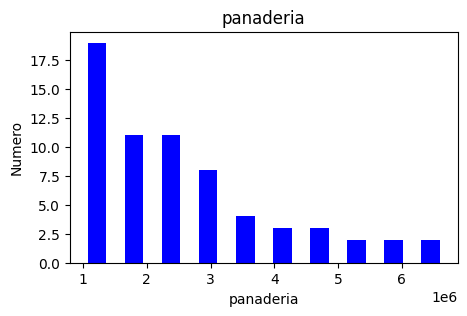

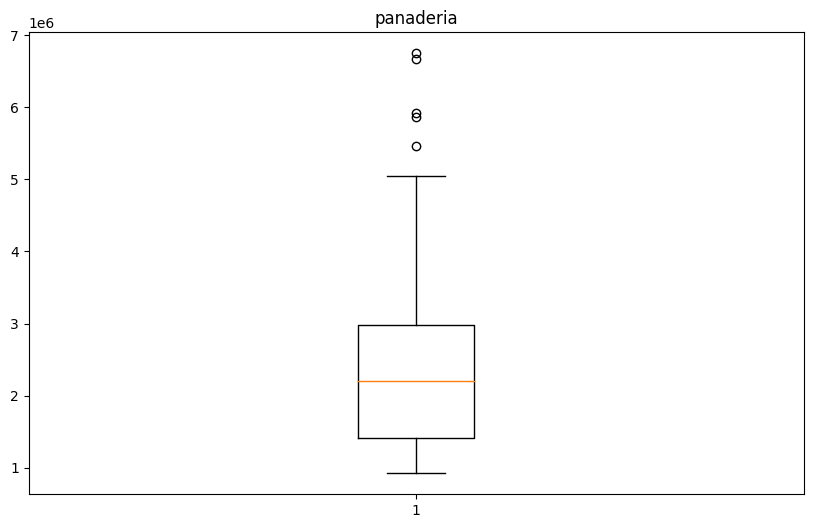

Limite superior permitido 5344003.4675
Limite inferior permitido -946571.9125000001


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
55,55,55,01/08/2021,124840.3,23990.1,124840320.0,120181530.9,4.658789e+06,124840320.0,38180625.56,...,34500426.75,5457753.494,14512831.62,14736387.95,4074608.926,1087448.228,15920169.14,2944642.775,8443256.20,10487530.93
59,59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,0.00
63,63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,0.00,11910475.62
64,64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [65]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["panaderia"], color='blue', rwidth=0.50)
plt.title('panaderia')
plt.xlabel('panaderia')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["panaderia"]) 
plt.title("panaderia")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["panaderia"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

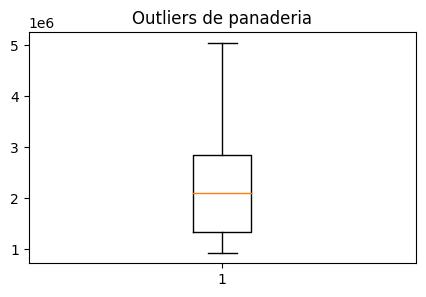

In [66]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["panaderia"]) 
plt.title("Outliers de panaderia")
plt.show() #dibujamos el diagrama

In [67]:
df.to_csv("df6.csv")
from google.colab import files   
files.download("df6.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

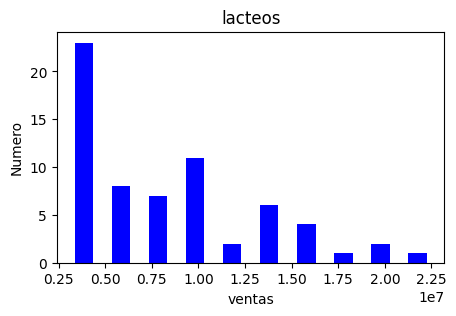

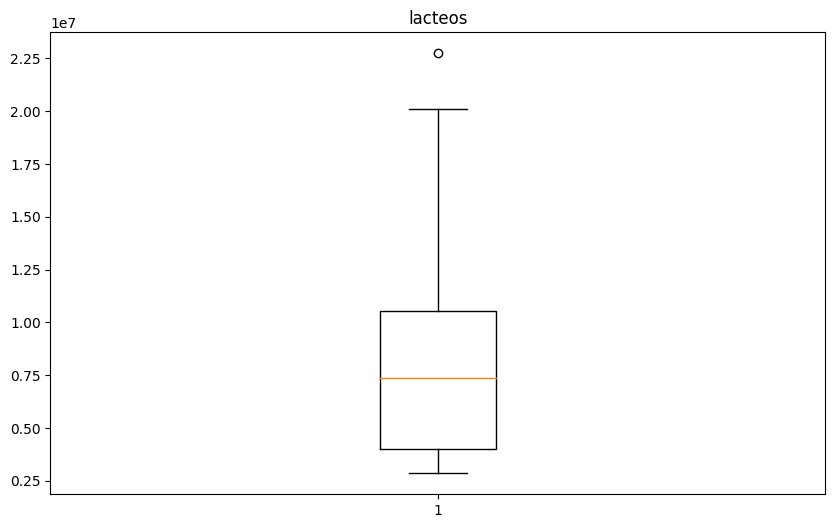

Limite superior permitido 20355207.2205
Limite inferior permitido -5818090.0075


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
48,48,48,01/01/2021,98007.6,24420.0,98007583.25,94524545.27,3483037.987,98007583.25,31878415.61,...,24393220.47,2973192.499,2.274527e+07,0.0,4076717.804,788246.1859,14237729.54,2206737.464,0.0,0.0


In [68]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["lacteos"], color='blue', rwidth=0.50)
plt.title('lacteos')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["lacteos"]) 
plt.title("lacteos")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["lacteos"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

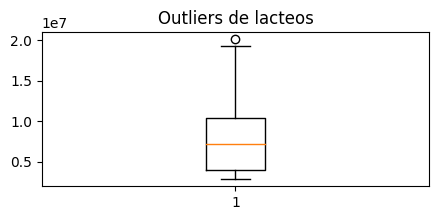

In [75]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 2))
plt.boxplot(data_clean_iqr["lacteos"]) 
plt.title("Outliers de lacteos")
plt.show() #dibujamos el diagrama

In [76]:
df.to_csv("df7.csv")
from google.colab import files   
files.download("df7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

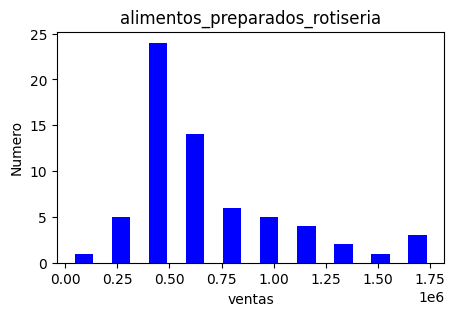

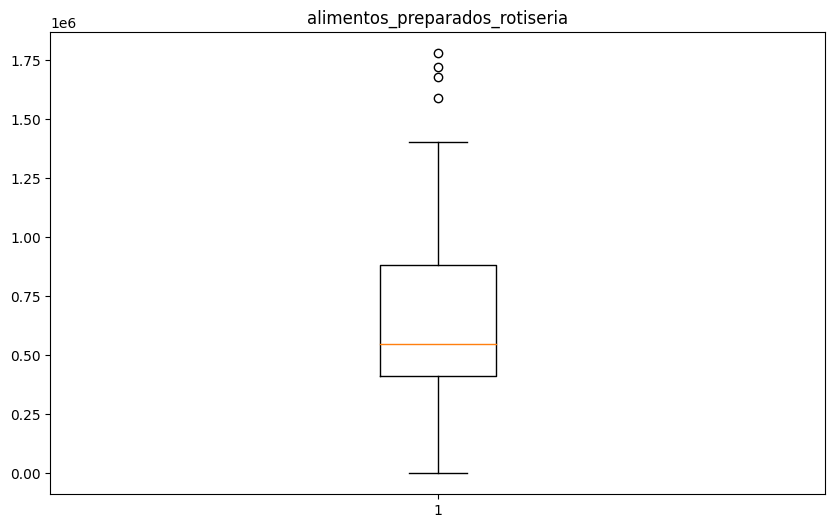

Limite superior permitido 1587857.7785
Limite inferior permitido -295824.8606999999


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5.116431e+06,183983151.9,56640033.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15
62,62,62,01/03/2022,16.5,24612.4,168982502.3,164321107.3,4.661350e+05,168982502.3,51262080.99,...,45418860.16,5922819.509,18419163.96,20827602.02,6886240.029,1589119.305,22942013.09,3912852.426,10898787.99,0.00
63,63,63,01/04/2022,177148.1,24140.5,177148082.8,173003799.1,4.144284e+06,177148082.8,53189998.68,...,49991675.91,6746166.557,19309461.59,22877841.24,6510665.781,1719458.547,23131265.85,4228053.874,0.00,11910475.62
64,64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4.280751e+06,179639238.6,52738110.62,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.470,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [81]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["alimentos_preparados_rotiseria"], color='blue', rwidth=0.50)
plt.title('alimentos_preparados_rotiseria')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["alimentos_preparados_rotiseria"]) 
plt.title("alimentos_preparados_rotiseria")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["alimentos_preparados_rotiseria"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr


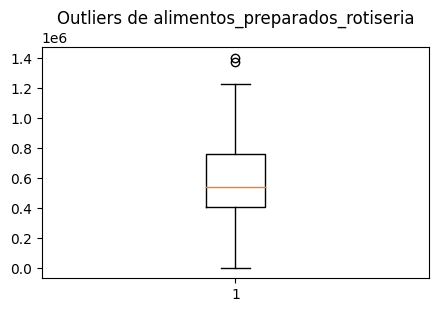

In [82]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["alimentos_preparados_rotiseria"]) 
plt.title("Outliers de alimentos_preparados_rotiseria")
plt.show() #dibujamos el diagrama

In [83]:
df.to_csv("df8.csv")
from google.colab import files   
files.download("df8.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

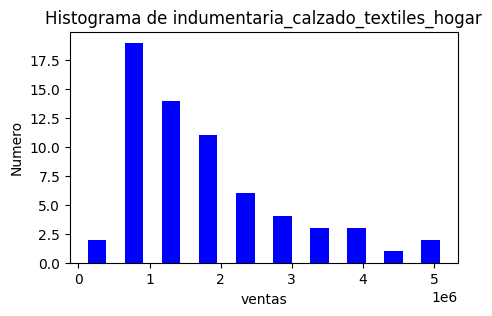

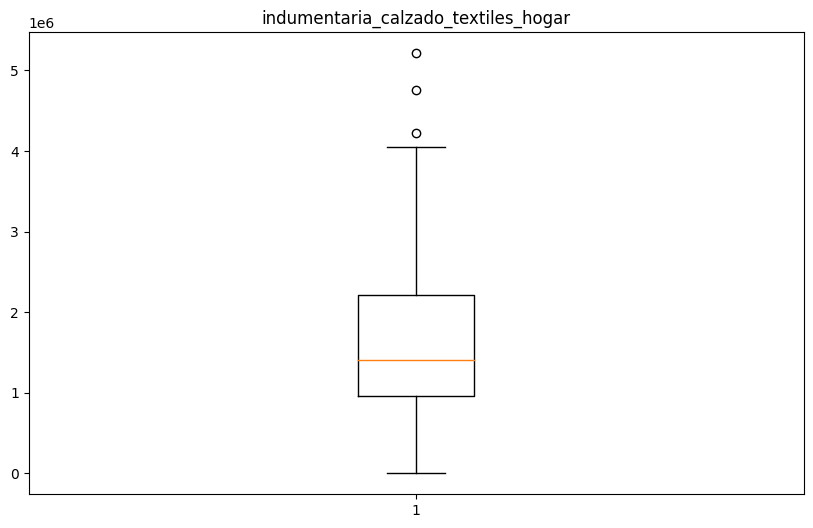

Limite superior permitido 5156970.953168336
Limite inferior permitido -1604600.4128114134


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
64,64,64,01/05/2022,179639.2,23234.2,179639238.6,175358487.5,4280751.113,179639238.6,52738110.62,...,50150351.46,6667329.665,20121124.43,22841532.85,6314109.47,1779482.857,23578638.71,5213152.564,12039595.55,12349980.06


In [86]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["indumentaria_calzado_textiles_hogar"], color='blue', rwidth=0.50)
plt.title('Histograma de indumentaria_calzado_textiles_hogar')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["indumentaria_calzado_textiles_hogar"]) 
plt.title("indumentaria_calzado_textiles_hogar")
plt.show() #dibujamos el diagrama

#Método aplicando desviación estandar. Encuentro los valores extremos
y=df["indumentaria_calzado_textiles_hogar"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers= df[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers


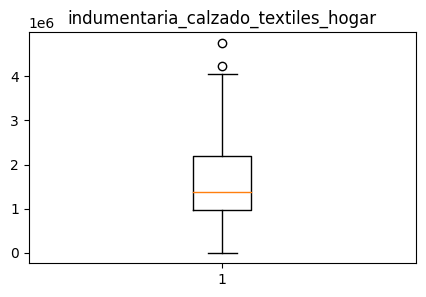

In [87]:
#Obtenemos datos limpios
data_clean= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["indumentaria_calzado_textiles_hogar"]) 
plt.title("indumentaria_calzado_textiles_hogar")
plt.show() #dibujamos el diagrama

In [88]:
df.to_csv("df9.csv")
from google.colab import files   
files.download("df9.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

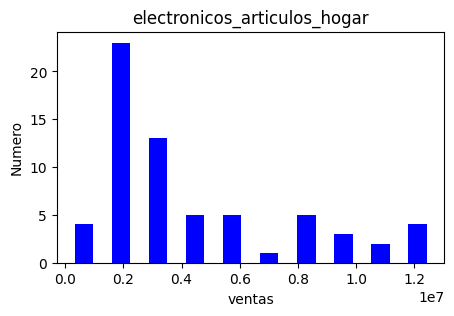

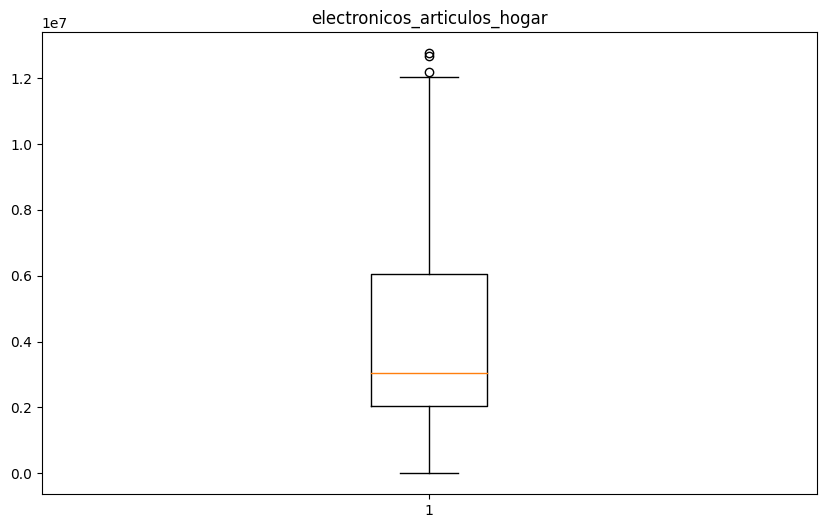

Limite superior permitido 14051831.364
Limite inferior permitido -5972461.016


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros


In [91]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["electronicos_articulos_hogar"], color='blue', rwidth=0.50)
plt.title('electronicos_articulos_hogar')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["electronicos_articulos_hogar"]) 
plt.title("electronicos_articulos_hogar")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["electronicos_articulos_hogar"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 2*iqr
Limite_Inferior_iqr= percentile25 - 2*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

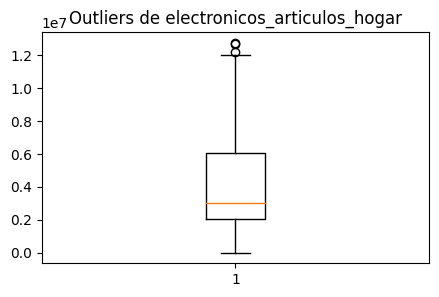

In [92]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["electronicos_articulos_hogar"]) 
plt.title("Outliers de electronicos_articulos_hogar")
plt.show() #dibujamos el diagrama

In [93]:
df.to_csv("df10.csv")
from google.colab import files   
files.download("df10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

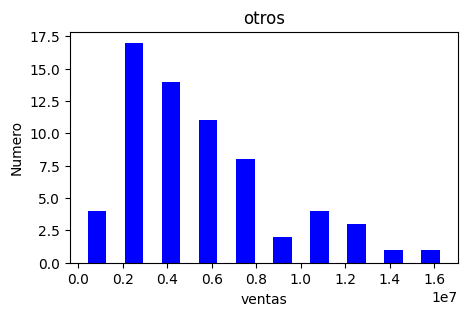

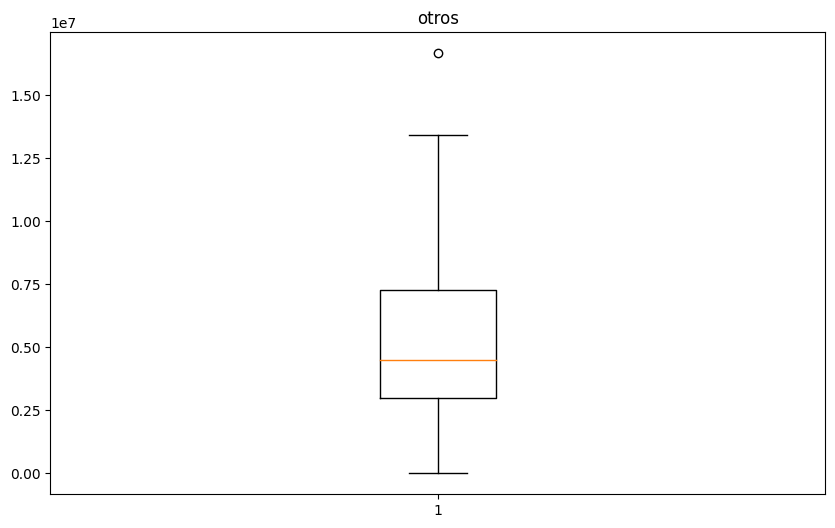

Limite superior permitido 13645555.3675
Limite inferior permitido -3393986.2364999987


,Unnamed: 0.1,Unnamed: 0,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
59,59,59,01/12/2021,183983.2,31595.7,183983151.9,178866721.2,5116430.634,183983151.9,56640033.15,...,45199914.72,5859939.041,16275221.46,21265049.45,5863700.608,1679028.685,21753939.73,4759532.634,12669269.76,16665123.15


In [94]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=df["otros"], color='blue', rwidth=0.50)
plt.title('otros')
plt.xlabel('ventas')
plt.ylabel('Numero')
plt.show() #dibujamos el histograma
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(df["otros"]) 
plt.title("otros")
plt.show() #dibujamos el diagrama

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df["otros"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)
#Encontramos Ouliers
outliers_iqr= df[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

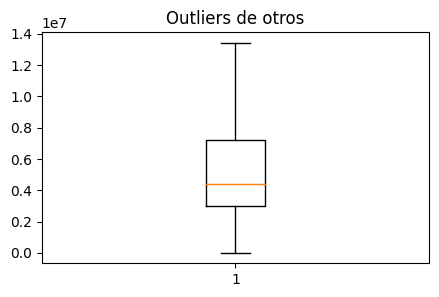

In [96]:
#Obtenemos datos limpios
data_clean_iqr= df[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["otros"]) 
plt.title("Outliers de otros")
plt.show() #dibujamos el diagrama

In [97]:
df.to_csv("df11.csv")
from google.colab import files   
files.download("df11.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>